In [20]:
from numpy import *
from sympy import *
import matplotlib.pyplot as plt
from numpy import gradient

x, y = symbols('x,y')

# Coordinates 
xk = 90     
yk = 20
xi = 110
yi = 80
xj = 80
yj = 100

xkj = xk - xj
xik = xi - xk
xji = xj - xi

ykj = yk - yj
yik = yi - yk
yji = yj - yi

# Temperatures
Ti = 60
Tj = 40
Tk = 40

# Displacements
ui = 2
vi = 0
uj = -1
vj = 1
uk = -2
vk = 2

# Thermal conductivity coefficient
lambda_coeff = 200

x_array = [xi, xj, xk]
y_array = [yi, yj, yk]

xw = ( max(x_array) + min(x_array) )/2
yw = ( max(y_array) + min(y_array) )/2

print('Point w coordinates')
display(xw); display(yw)

Point w coordinates


95.0

60.0

In [19]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

P1 = Point(xi,yi)
P2 = Point(xj,yj)
P3 = Point(xk,yk)

A = S.Half*absolute(P1.x*(P2.y - P3.y) + P2.x*(P3.y - P1.y) + P3.x*(P1.y - P2.y))
print('Area')
display(A)


def Ni(x,y):
    return 1/(2*A)* (ykj*(xj - x) - xkj*(yj - y))

def Nj(x,y):
    return 1/(2*A)* (yik*(xk - x) - xik*(yk - y))

def Nk(x,y):
    return 1/(2*A)* (yji*(xi - x) - xji*(yi - y))

def T(x,y):
    return Ni(x,y)*Ti + Nj(x,y)*Tj + Nk(x,y)*Tk



Be = Matrix([[Ni(x,y).diff(x), Nj(x,y).diff(x), Nk(x,y).diff(x)], [Ni(x,y).diff(y), Nj(x,y).diff(y), Nk(x,y).diff(y)]])
Temperature_vector = Matrix([[Ti],[Tj], [Tk]])

Temperature_gradient = Be*Temperature_vector
q = -Temperature_gradient*lambda_coeff

print("Heat flux vector")
display(q)

Area


1100

Heat flux vector


Matrix([
[-1600/11],
[ -200/11]])

# Deformation state analysis

In [17]:
def u(x,y):
    return Ni(x,y)*ui + Nj(x,y)*uj + Nk(x,y)*uk


def v(x,y):
    return Ni(x,y)*vi + Nj(x,y)*vj + Nk(x,y)*vk

print('Point w displacements')
uw = u(xw, yw)  ;   display(uw)
vw = v(xw, yw)  ;   display(vw)



N_matrix = Matrix([[Ni(x,y).diff(x), 0, Nj(x,y).diff(x), 0, Nk(x,y).diff(x), 0],
                   [0, Ni(x,y).diff(y), 0, Nj(x,y).diff(y), 0, Nk(x,y).diff(y)],
                   [Ni(x,y).diff(y), Ni(x,y).diff(x), Nj(x,y).diff(y), Nj(x,y).diff(x), Nk(x,y).diff(y), Nk(x,y).diff(x)]])

displacement_vector = Matrix([[ui],[vi],[uj],[vj],[uk],[vk]])

print('Strains')
display(N_matrix*displacement_vector)


display(u(x,y).diff(x))
display(v(x,y).diff(y))

display(v(x,y).diff(x) + u(x,y).diff(y))

Point w displacements


-0.318181818181818

1.04545454545455

Strains


Matrix([
[13/110],
[ -1/55],
[ -1/55]])

13/110

-1/55

-1/55

# Plot

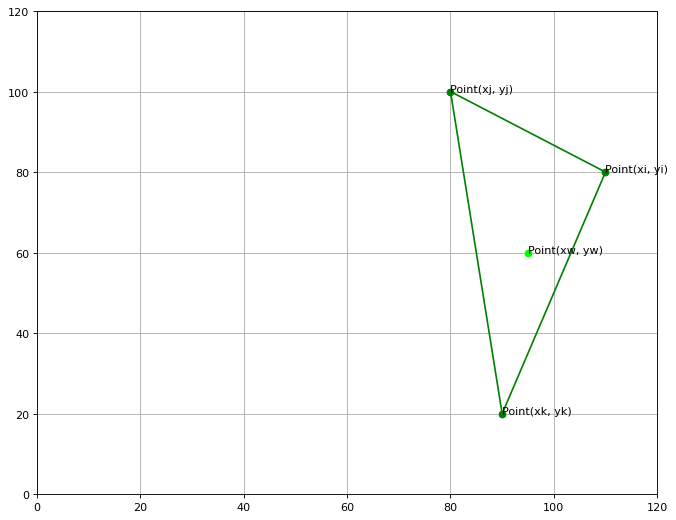

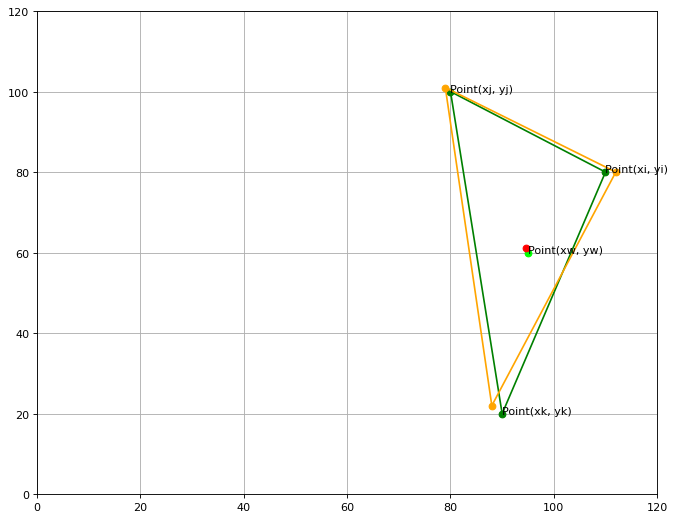

In [12]:
fig = plt.figure(figsize = (10,8) , dpi=80)
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
plt.scatter(xi, yi, color = 'green')
plt.text(xi, yi, 'Point(xi, yi)')
plt.scatter(xj, yj, color = 'green')
plt.text(xj, yj, 'Point(xj, yj)')
plt.scatter(xk, yk, color = 'green')
plt.text(xk, yk, 'Point(xk, yk)')
plt.scatter(xw, yw, color = 'lime')
plt.text(xw, yw, 'Point(xw, yw)')
linex1 = [xi, xj]
liney1 = [yi, yj]
plt.plot(linex1, liney1, color = 'green')
linex1 = [xj, xk]
liney1 = [yj, yk]
plt.plot(linex1, liney1, color = 'green')
linex1 = [xi, xk]
liney1 = [yi, yk]
plt.plot(linex1, liney1, color = 'green')
ax.set_xlim(0,120)
ax.set_ylim(0, 120)



# <-------------------------- Before & After deformation
fig = plt.figure(figsize = (10,8) , dpi=80)
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
plt.scatter(xi, yi, color = 'green')
plt.text(xi, yi, 'Point(xi, yi)')
plt.scatter(xj, yj, color = 'green')
plt.text(xj, yj, 'Point(xj, yj)')
plt.scatter(xk, yk, color = 'green')
plt.text(xk, yk, 'Point(xk, yk)')
plt.scatter(xw, yw, color = 'lime')
plt.text(xw, yw, 'Point(xw, yw)')
linex1 = [xi, xj]
liney1 = [yi, yj]
plt.plot(linex1, liney1, color = 'green')
linex1 = [xj, xk]
liney1 = [yj, yk]
plt.plot(linex1, liney1, color = 'green')
linex1 = [xi, xk]
liney1 = [yi, yk]
plt.plot(linex1, liney1, color = 'green')
ax.set_xlim(0,120)
ax.set_ylim(0, 120)



plt.scatter(xi+ui, yi+vi, color = 'orange')
plt.scatter(xj+uj, yj+vj, color = 'orange')
plt.scatter(xk+uk, yk+vk, color = 'orange')
linex1 = [xi+ui, xj+uj]
liney1 = [yi+vi, yj+vj]
plt.scatter(xw+uw, yw+vw, color = 'red')
plt.plot(linex1, liney1, color = 'orange')
linex1 = [xj+uj, xk+uk]
liney1 = [yj+vj, yk+vk]
plt.plot(linex1, liney1, color = 'orange')
linex1 = [xi+ui, xk+uk]
liney1 = [yi+vi, yk+vk]
plt.plot(linex1, liney1, color = 'orange')